# About Dataset

This dataset contains information about the chemical properties of glass and includes six classes to classify samples of glass based on their chemical properties. The dataset was created by Vina Spiehler in 1987 and was motivated by criminological investigation, where glass left at a crime scene can be used as evidence if it is correctly identified. The dataset includes 214 observations and measures the weight percent in corresponding oxide of various elements such as Sodium, Magnesium, Aluminum, Silicon, Potassium, Calcium, Barium, and Iron. The dataset also includes a class attribute that identifies the type of glass, which can be building windows, vehicle windows, containers, tableware, or headlamps. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

# Importation of key libraries

In [1]:
import numpy as np  # linear modelling
import pandas as pd  # read and handle dataframes
import matplotlib.pyplot as plt # representation visually
import seaborn as sns # aesthetics and statistical visualisations
from sklearn.base import TransformerMixin # to develop fresh transformation classes
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preliminary processing 
from sklearn.decomposition import PCA # Diminishing the dimensions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # transform data
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # modules for model selection
from sklearn.pipeline import Pipeline # streamlining pipelines
from sklearn.base import BaseEstimator, TransformerMixin # developing a class for the box-cox transition
from collections import Counter
import warnings
#model loads
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Examining the dataset's form after it has been loaded

In [3]:
df = pd.read_csv('glass.csv')
features = df.columns[:-1].tolist()
print(features)
print(df.shape)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
(214, 10)


The dataset has 214 observations in it.

In [4]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Summarising the data

descriptive data analysis

Summarising how the numerical variables are distributed.

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The characteristics are not scaled equally. For instance, the mean value for Si is 72.65, whereas the mean for Fe is 0.057. For methods like logistic regression (gradient descent) to converge smoothly, features must be on the same scale. Let's check the distribution of the different glass types now.

In [7]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

The dataset is not evenly distributed. More than 67% of the glass types are instances of categories 1 and 2.

# Visualization of data

Single-variable graphs

Let's take a closer look at how these dataset's various attributes are distributed.

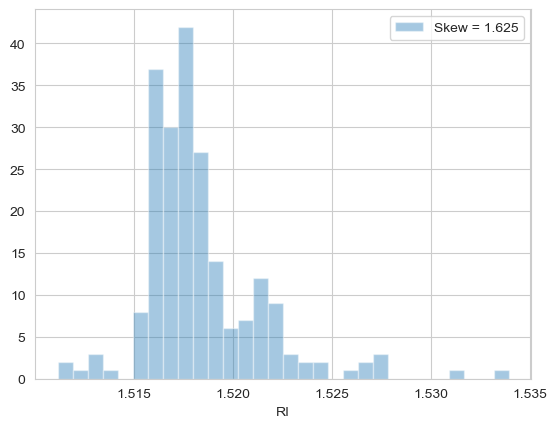

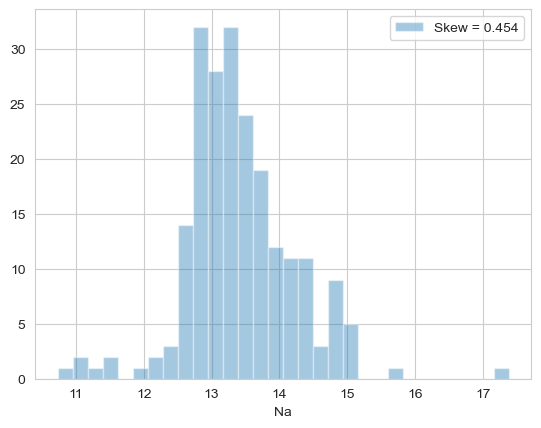

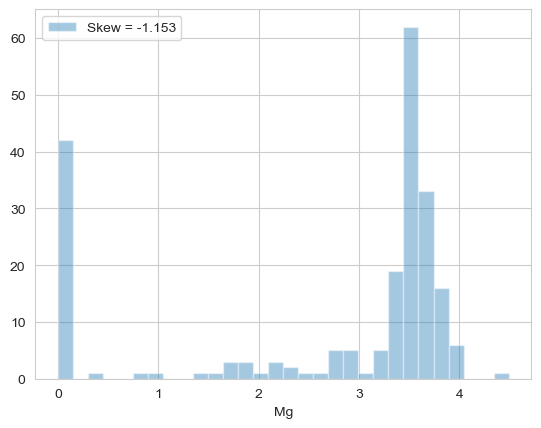

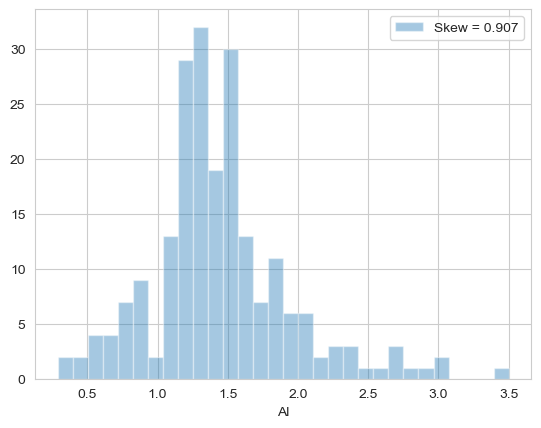

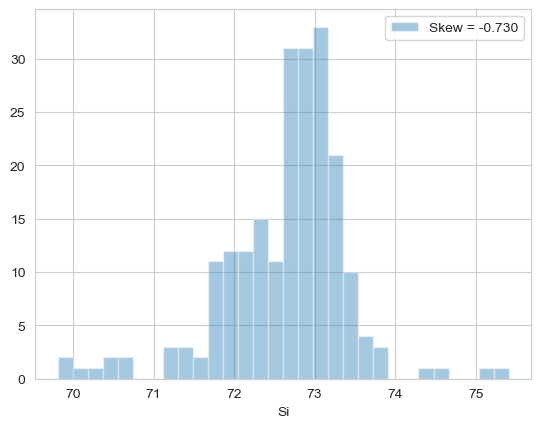

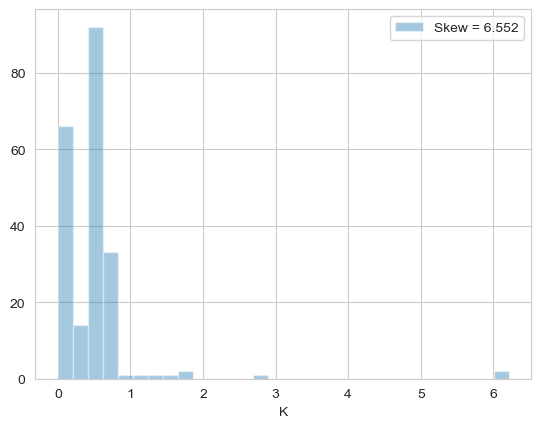

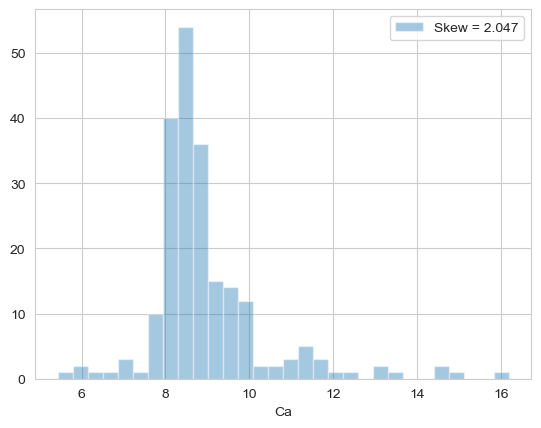

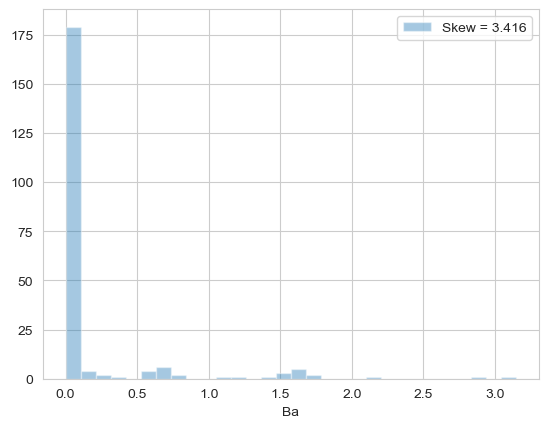

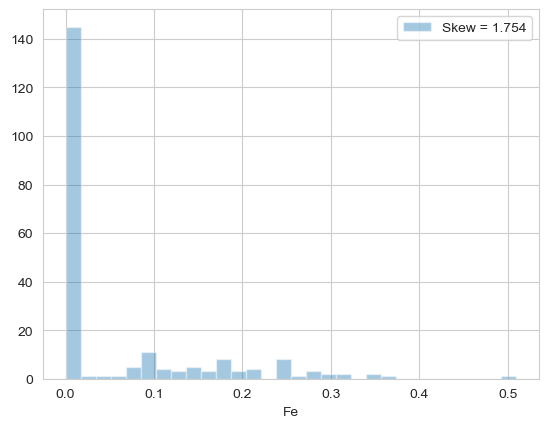

In [8]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features are dispersed normally. The highest skew coefficients are seen in the characteristics Fe, Ba, Ca, and K. Additionally, there appear to be numerous outliers in the distribution of potassium (K) and barium (Ba). Using Turkey's approach to determine the indices of the data that contain outliers.

In [9]:
# Finding observations with several outliers

def outlier_hunt(df):
    """
    gives a list of the indices corresponding to the observations containing more than two outliers after receiving
    a dataframe df of feature data.  
    """
    outlier_indices = []
    
    # iterate over the columns (features)
    for col in df.columns.tolist():
        # quartile one (25%)
        Q1 = np.percentile(df[col], 25)
        
        # Quartile 3rd (75%).
        Q3 = np.percentile(df[col],75)
        
        # IQR, or interquartile range
        IQR = Q3 - Q1
        
        #outlier action
        outlier_step = 1.5 * IQR
        
        # Create a list of feature-column outlier indices.
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # the list of outlier indices should include the discovered outlier indices for col. 
        outlier_indices.extend(outlier_list_col)
        
    # choose observations with more than two outliers.
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


14 observations had numerous outliers in them. These might reduce how effectively our learning algorithms work. These will be removed in the parts that follow.

    The boxplots for the various distributions will be examined now.

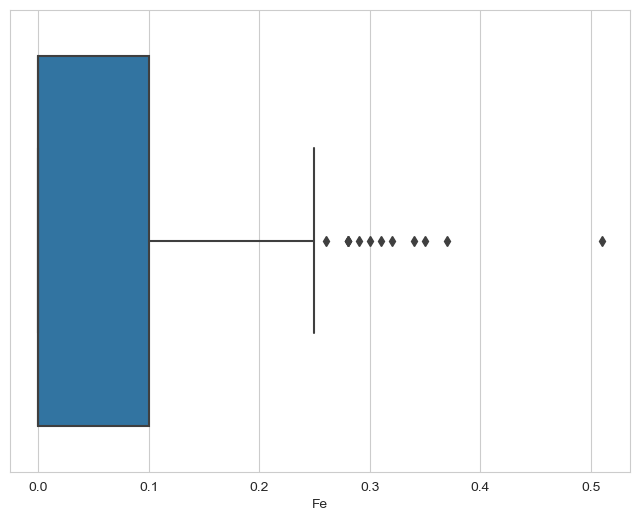

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(df[feat])
plt.show()


As we showed in the previous section, Silicon has a mean that is obviously considerably higher than that of the other elements. That makes sense given that silica makes up the majority of glass.

# Multivariate graphs

Next, let's create a pairplot to graphically analyse the relationship between the features.

<Figure size 800x800 with 0 Axes>

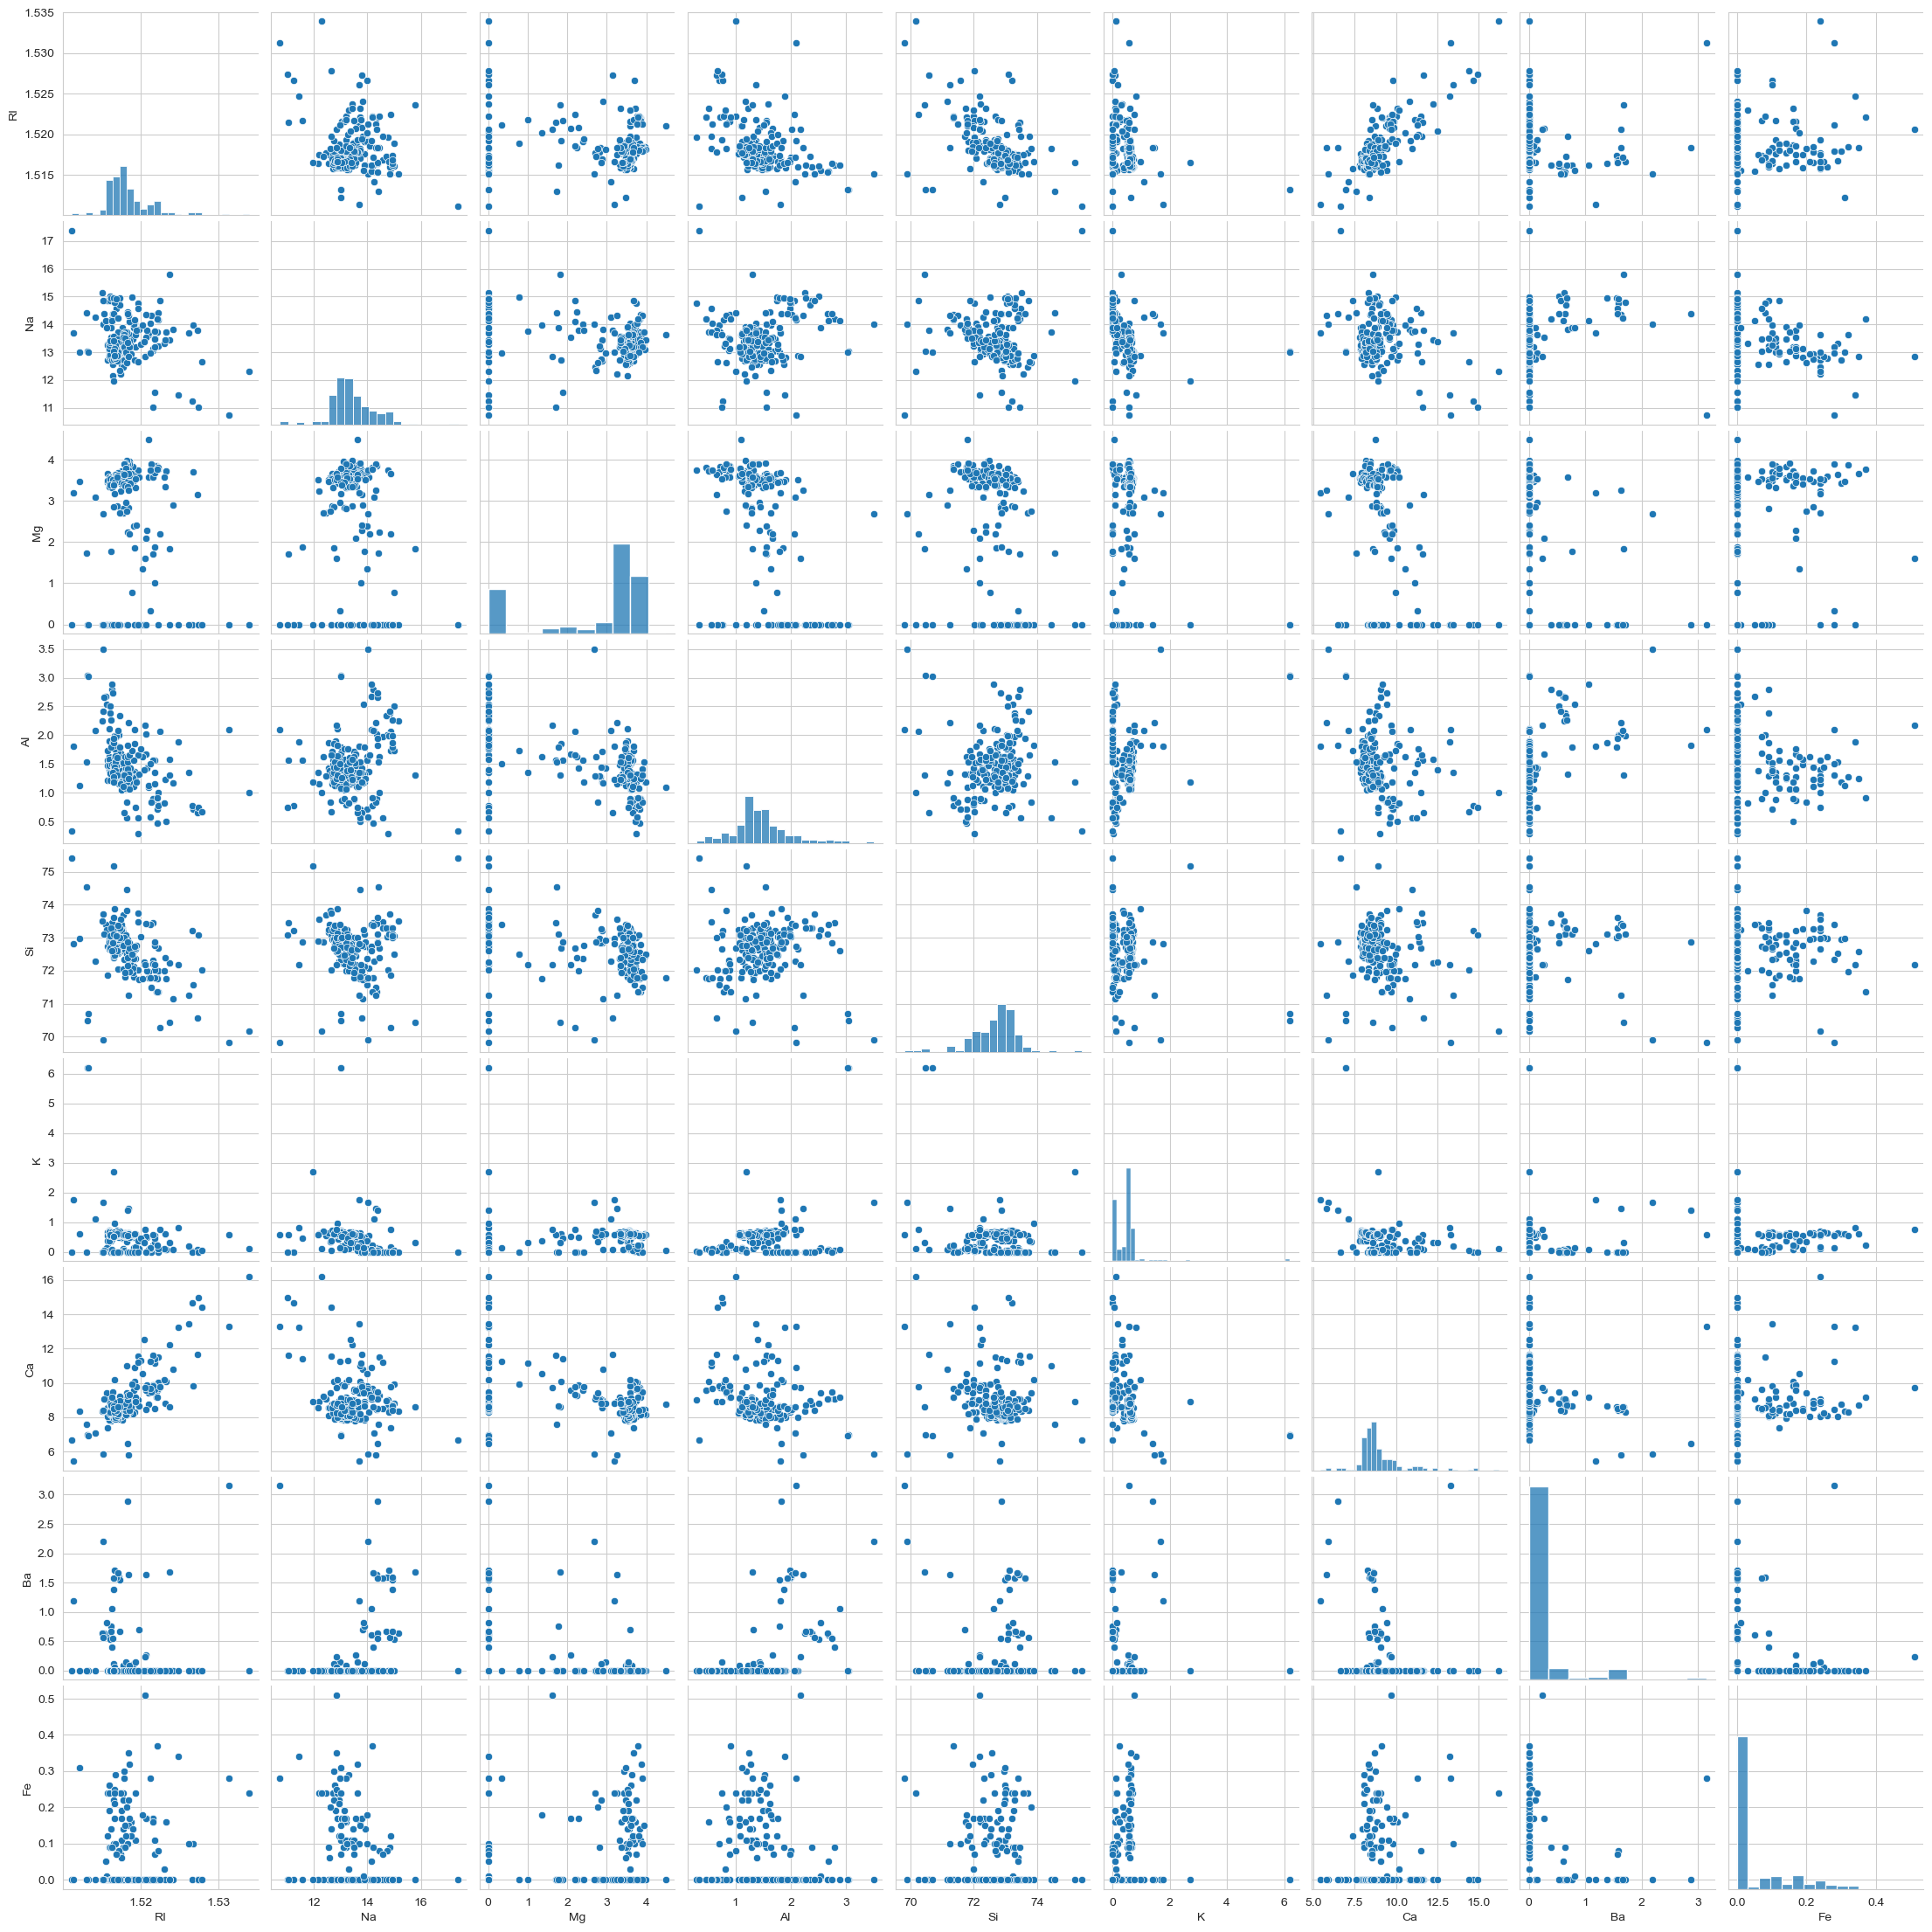

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

Checking out a heatmap of the correlations now.

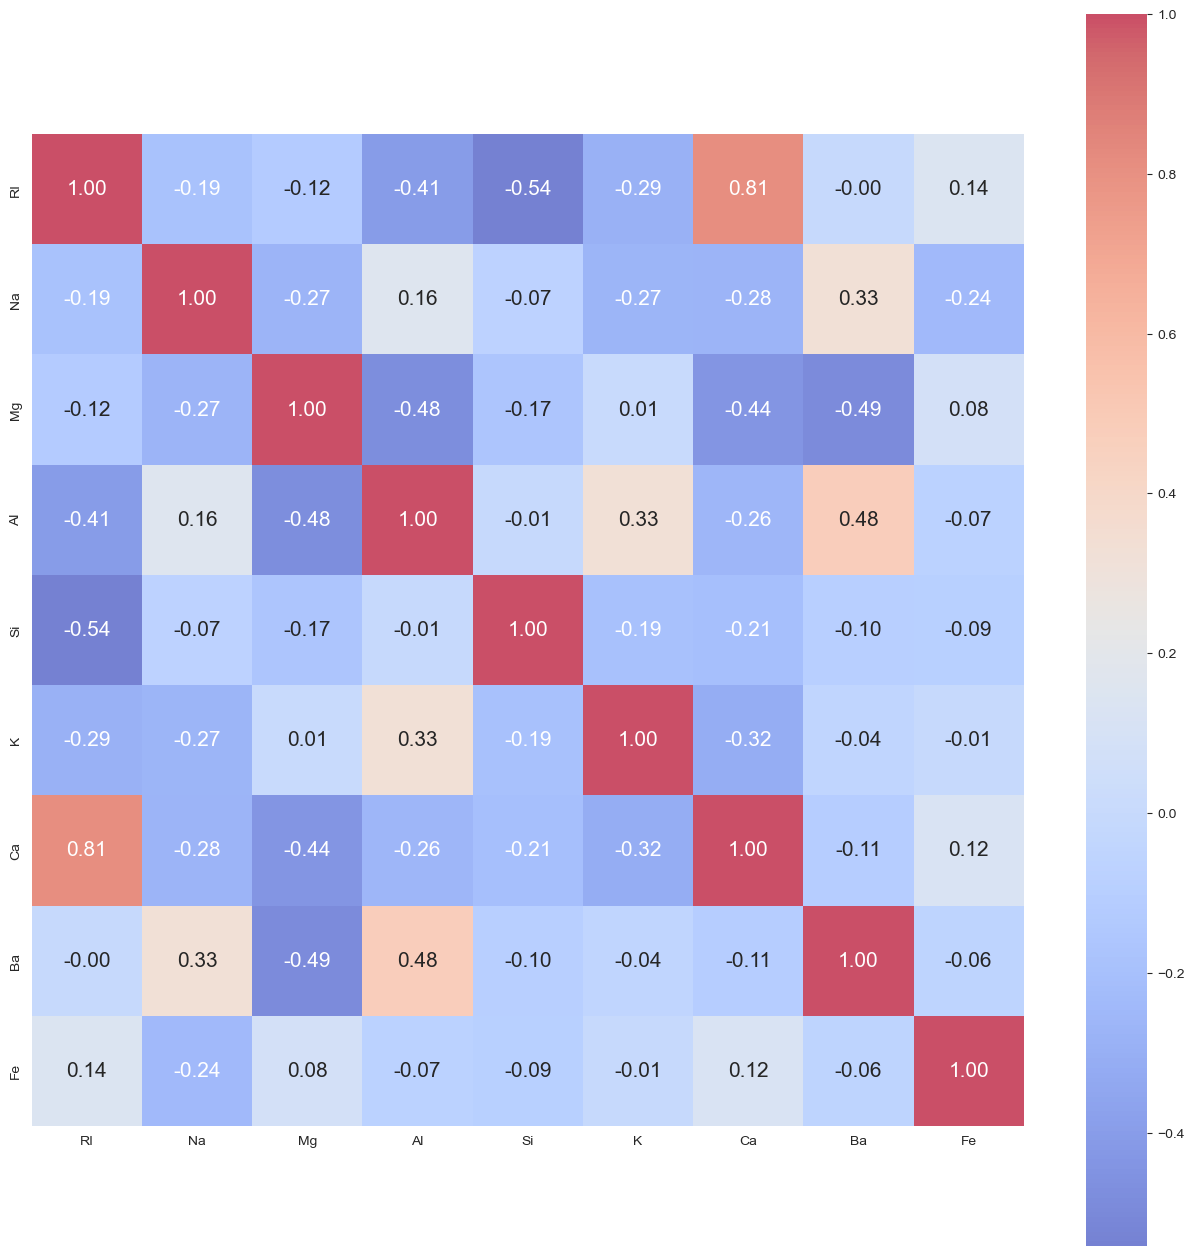

In [13]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

Between RI and Ca, there appears to be a significant positive association. In order to decorrelate some of the input features, this can be a suggestion to run a principal component analysis.

# Developing Data

# Cleansing of data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


This dataset is complete; no values are missing from it.

# Identifying and eliminating several outliers

Using the function we developed in the previous section to eliminate the observations that contain numerous outliers.

In [15]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


We have 200 observations left after removing observations with numerous outliers (greater than 2).Looking at how our distributions seem now.

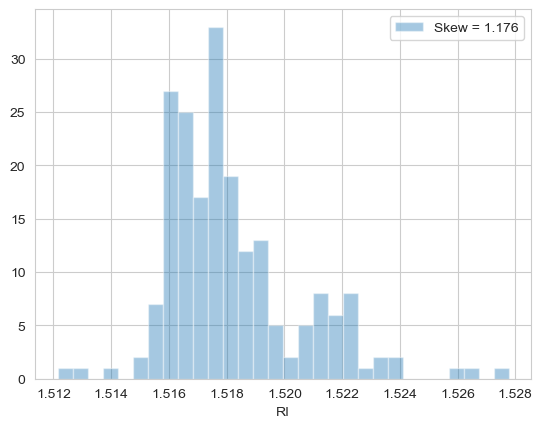

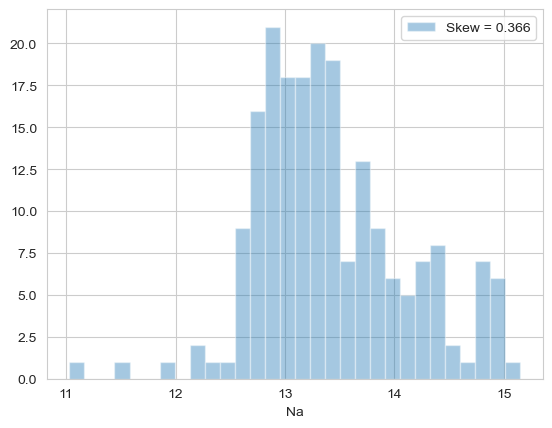

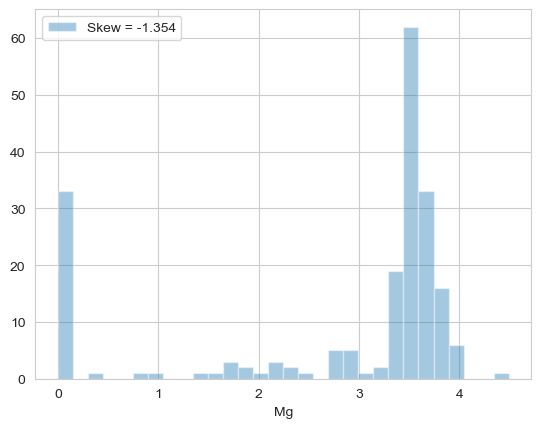

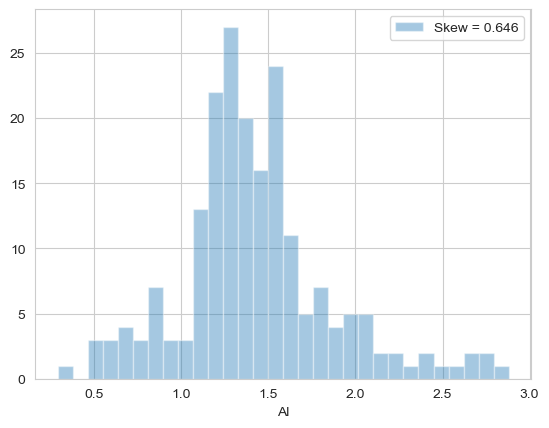

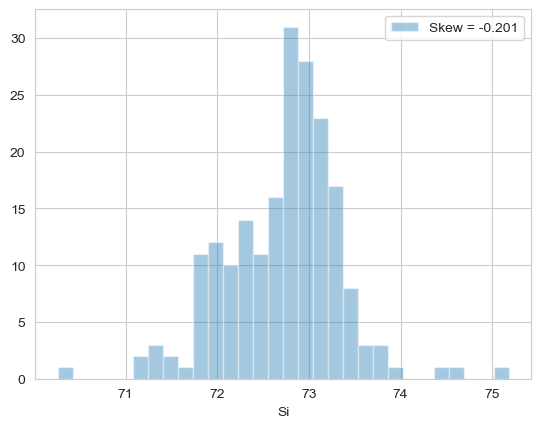

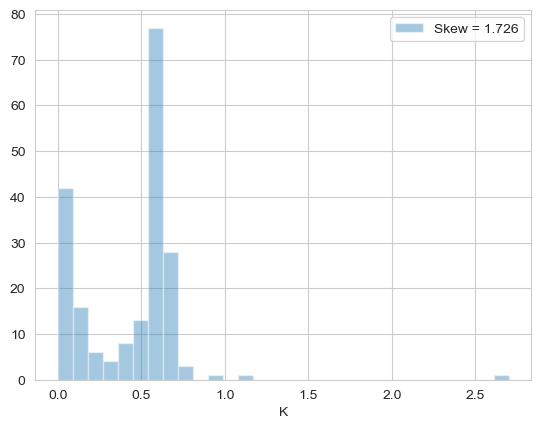

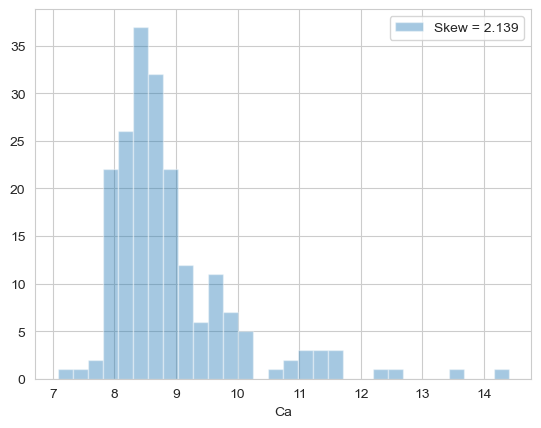

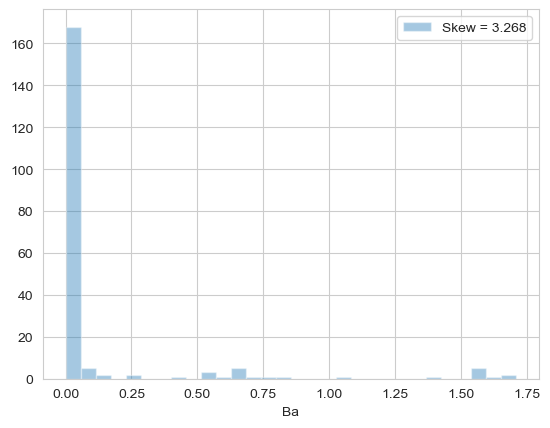

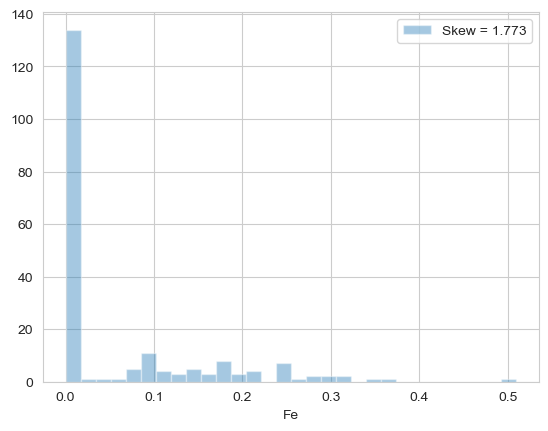

In [16]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [16]:
df['Type'].value_counts()

1    70
2    70
7    25
3    17
5    10
6     8
Name: Type, dtype: int64

Plotting the Types distribution.

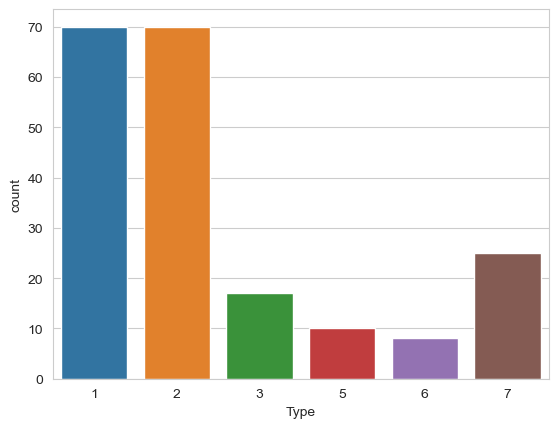

In [17]:
sns.countplot(df['Type'])
plt.show()

# Separation of the validation dataset

In [17]:
# Declaring X to be features and Y to be labels.
X = df[features] 
y = df['Type'] 
# determining the dataset's test size and seed. 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

# Transformation of data

Let's investigate whether a Box-Cox transform can help some features become more normalised. To prevent data snooping, it should be emphasised that only the training set should be used for any transformations. Otherwise, the estimation of the test error will be biased.

In [18]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  #To avoid computing the log of negative values, shifting by 1.
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']

In [19]:
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,6.159461e-04,0.910643,14.813501,0.955244,6.067071e+09,0.342872,1.999249e-01,0.013377,0.019141,2.670000
std,9.782306e-19,0.003076,8.011923,0.217702,2.873472e+08,0.213507,8.577972e-07,0.031188,0.027757,2.054802
min,6.159461e-04,0.897962,0.000000,0.261374,5.004587e+09,0.000000,1.999215e-01,0.000000,0.000000,1.000000
25%,6.159461e-04,0.908540,10.569803,0.850076,5.893126e+09,0.122922,1.999244e-01,0.000000,0.000000,1.000000
50%,6.159461e-04,0.910269,18.555034,0.938477,6.106954e+09,0.447403,1.999248e-01,0.000000,0.000000,2.000000
75%,6.159461e-04,0.912445,19.835863,1.060851,6.238759e+09,0.480536,1.999254e-01,0.000000,0.051652,3.000000
max,6.159461e-04,0.917711,31.408319,1.561947,7.293074e+09,1.392148,1.999270e-01,0.091142,0.068796,7.000000


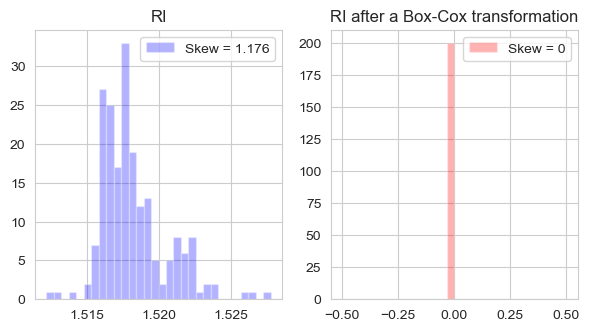

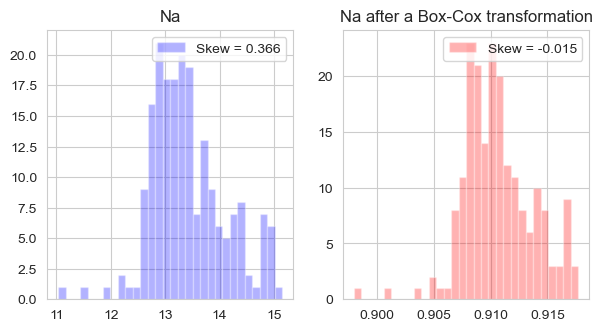

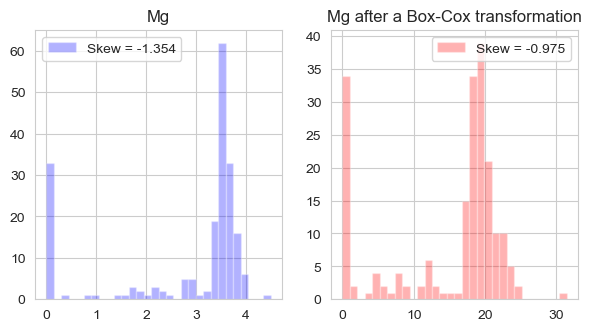

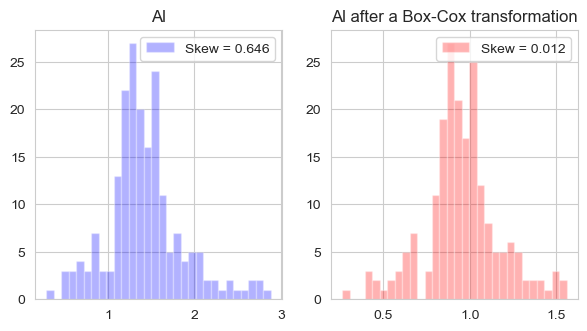

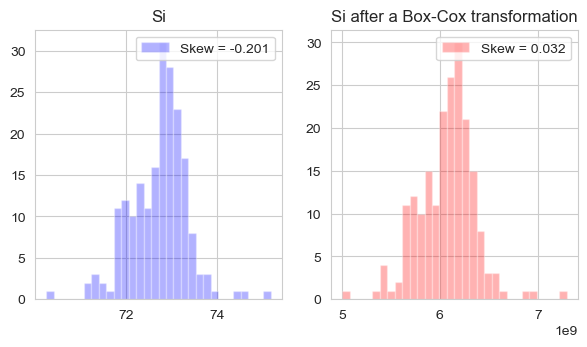

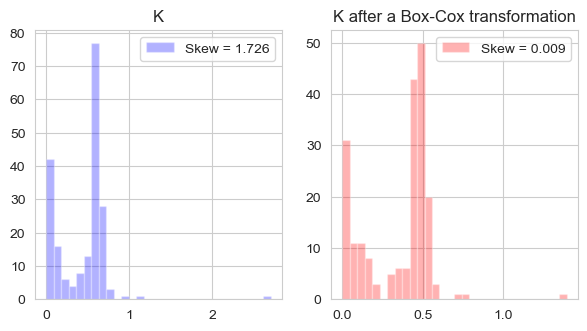

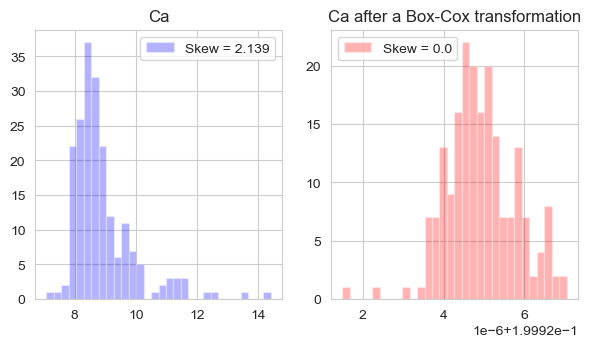

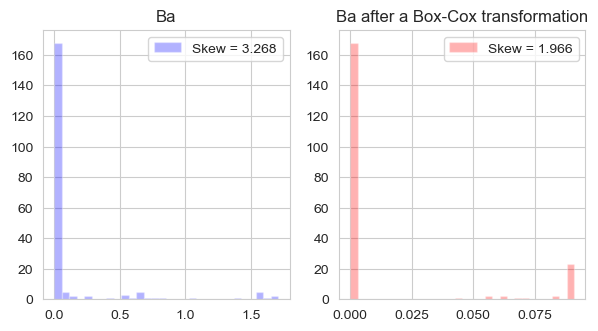

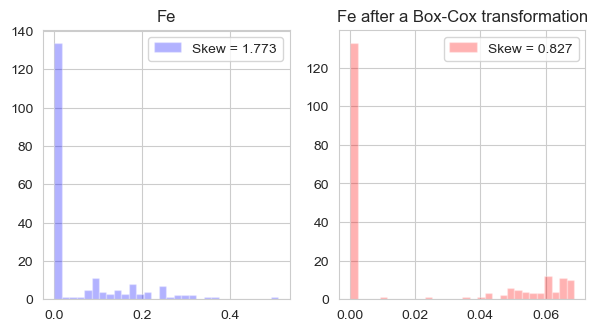

In [20]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [21]:
# after a box-cox transform, determining if the skew is closer to zero.
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Box-Cox transform' %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform


In terms of minimising the skews of the various feature distributions, the Box-Cox transform appears to be effective. The feature distributions are not normalised as a result, though. Trial and error demonstrated that it has no effect on the performance of the employed algorithms. Let's examine dimensionality reduction strategies next.

# Review algorithms

# Reduction in dimensions

# PCA

Plotting the cumulative explained variance will be done after doing a PCA on the features to decorrelate the ones that are linearly dependent.

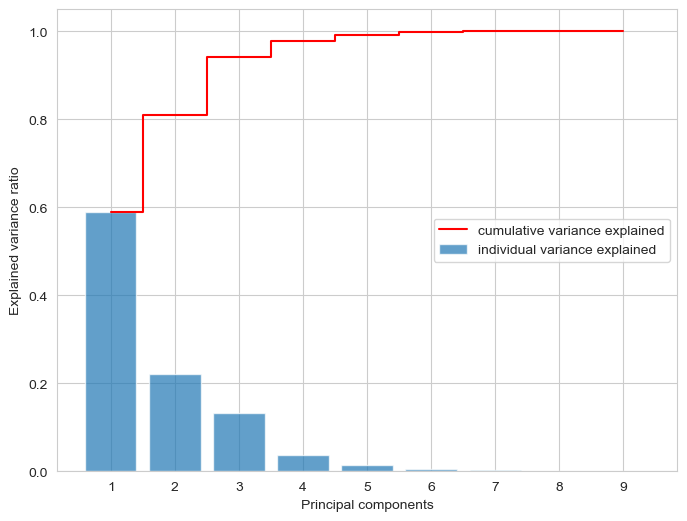

In [29]:
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()



# Data Processing

In [35]:
#data concerning the information in hand

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      200 non-null    float64
 1   Na      200 non-null    float64
 2   Mg      200 non-null    float64
 3   Al      200 non-null    float64
 4   Si      200 non-null    float64
 5   K       200 non-null    float64
 6   Ca      200 non-null    float64
 7   Ba      200 non-null    float64
 8   Fe      200 non-null    float64
 9   Type    200 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


Results:
    
    This dataset is complete; no values are missing from it.

In [38]:
#Eliminating outliers
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)

print(df.shape)

(181, 10)


# Data Normalisation

In [39]:
##Scaling and normalising the data in Range [0,1] 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
     

In [40]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [41]:
y.head(2)

0    1
1    1
Name: Type, dtype: int64

# The features' size

In [42]:
from sklearn import preprocessing
X=preprocessing.scale(X)

# Data Visualisation Following Preprocessing

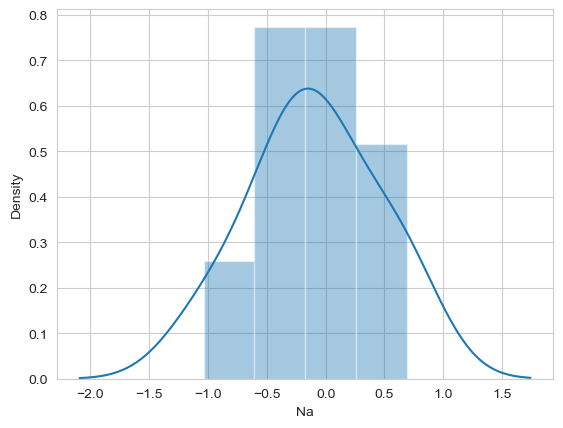

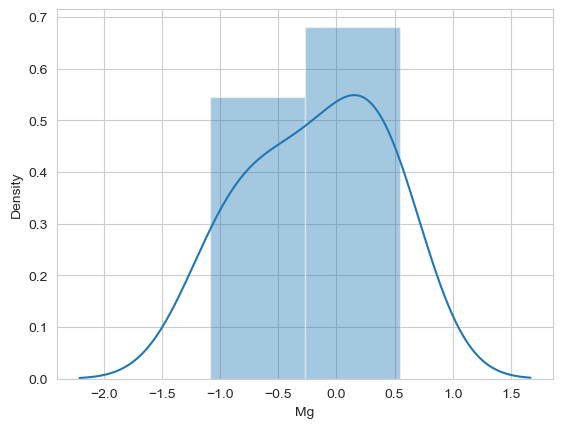

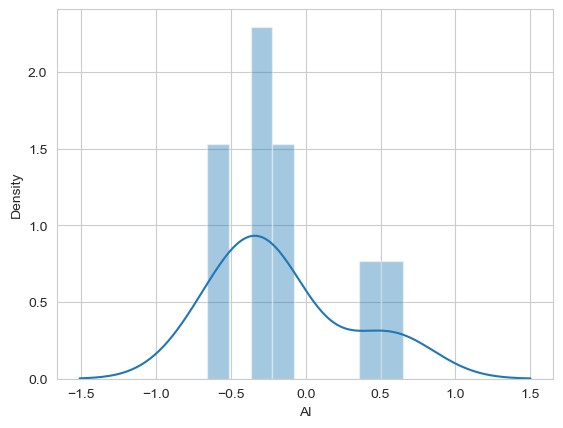

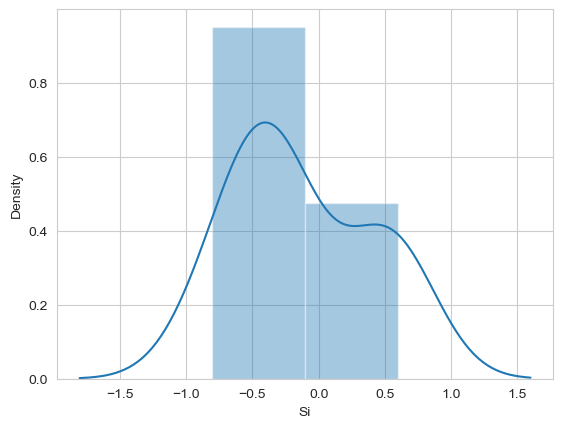

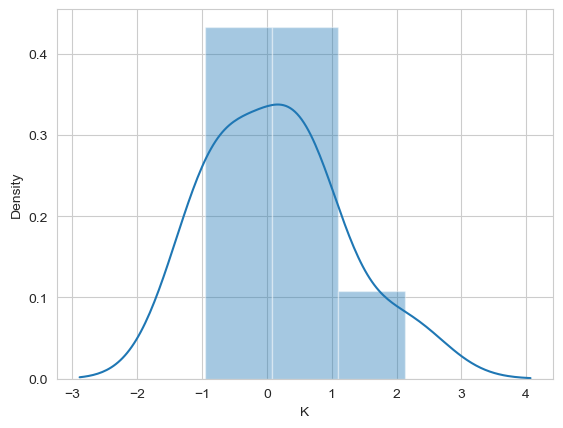

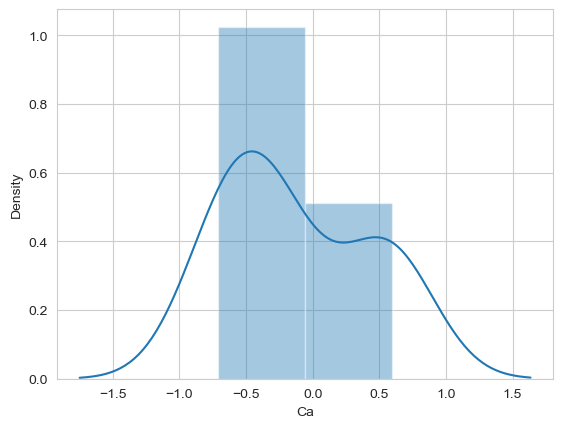

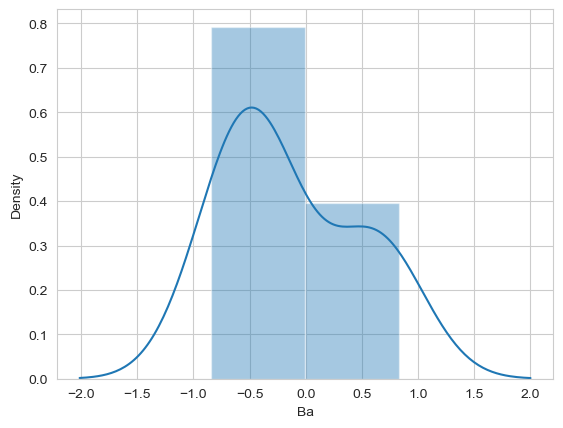

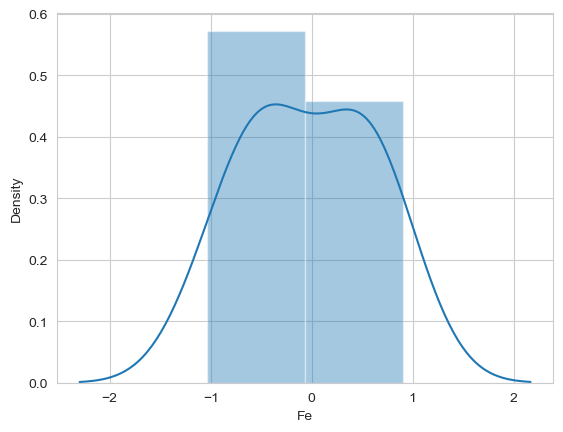

In [43]:

x2 = X


for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

Results

As shown in the aforementioned diagrams, after preprocessing,

Skewness is diminished.

The data is more standardised.

# Splitting the training and test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (150, 9)
Shape of X_test = (50, 9)
Shape of y_train = (150,)
Shape of y_test = (50,)


# Various Machine Learning Models Are Trained

# Using K-Nearest Neighbours

In [45]:
Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.7
[0.72, 0.64, 0.74, 0.74, 0.76, 0.76, 0.7, 0.7, 0.7]


# Using Decision-making Tree

In [46]:
Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.52]


# Using Logical Regression

In [47]:
Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.74
[0.7]


# Using SVM (Non-Linear) Classifier

In [48]:
Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7733333333333333
[0.78]


# Conclusion

Of the aforementioned models

# Decision Tree

Overfitting in the decision tree:-
    
    Accuracy in training: 1.0
        
    Accuracy of testing: 0.52

# Nonlinear Kernel SVM

The best results are provided by SVM (Non Linear Kernel) with:
    
    Accuracy in training: 0.773
    Accuracy of the test: 0.78.